In [26]:
import csv
import pandas as pd
import numpy as np
from datetime import datetime
import dateutil.parser
from IPython.display import display
import math
import copy 

from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, average_precision_score
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from sklearn.model_selection import train_test_split



pd.options.display.max_columns = None
pd.set_option('display.max_rows', None)



In [4]:
df=pd.read_pickle("./week1_clean_pickled.pkl")
#df = pd.read_pickle('/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/week1_clean_pickled.pkl')

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from '/usr/local/lib/python3.9/site-packages/pandas/_libs/internals.cpython-39-darwin.so'>

In [ ]:
meow=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/dec5_features_combined.csv")
meow.head(3)

In [ ]:
print(len(meow))

In [ ]:
#can skip to way later if using Jing Chun's preprocessed csv

In [ ]:
df=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/combined_per_player_block.csv")
df.head(3)

In [ ]:
df1=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/combined_per_player_rush.csv")
df1.head(3)

In [ ]:
print(set(df.pff_role))
print(set(df1.pff_role))
print(df.shape)
print(df1.shape)
print(df2.shape)

In [ ]:
frames = [df,df1]

result = pd.concat(frames)
print(result.shape)
result.head(3)

In [ ]:
result=result.drop(columns=['Unnamed: 0'])
result.head(3)

In [ ]:
print(set(result.pff_role))


In [ ]:
df2=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/2023/pffScoutingData.csv")
set(df2.playId)

In [ ]:
df3=df2[df2.columns[df2.columns.isin(['gameId','playId','nflId','pff_hit','pff_hurry','pff_sack'])]]
df3.head(3)

In [ ]:
print(result.shape)
print(df3.shape)

In [ ]:
df4=df3.merge(result, left_on=['gameId','playId','nflId'],right_on=['gameId','playId','nflId'])

In [ ]:
print(df4.shape)
df4.head(2)

In [ ]:
df5=df4.dropna()
print(df5.shape)
df5.head(2)

In [ ]:
df5['outcome']=0
df5.loc[df5['pff_hurry'] == 1, 'outcome']='Hurry'
df5.loc[df5['pff_hit'] == 1, 'outcome']='Hit'
df5.loc[df5['pff_sack'] == 1, 'outcome']='Sack'

In [ ]:
df5.head(2)

In [ ]:
x_df=df5[df5.columns[~df5.columns.isin(['gameId','playId','nflId','outcome'])]]
x_df.head(3)

In [ ]:
y_df=df5[df5.columns[df5.columns.isin(['outcome'])]]
y_df.head(3)

In [ ]:
#continue from here using Jing chun's.

In [6]:
new_df=pd.read_csv("/Users/joonghochoi/Desktop/NFLBigDataBowl/NFL/2023/by_frame_all.csv")
new_df.head(2)

,Unnamed: 0,playId,gameId.x,frameId,dist_name,dist_to_qb_name,area_name,x_force_name,y_force_name,norm_weighted_x_name,norm_weighted_y_name,net_x_force_bottom_name,net_x_force_middle_name,net_x_force_top_name,net_y_force_bottom_name,net_y_force_middle_name,net_y_force_y_name,gameId.y,hit,hurry,sack,bad_thing
0,1,55,2021091300,5,2.997692,4.280639,47.856033,-350.675972,18.667865,-336.460695,33.720778,0.0,-597.356840,-122.274350,0.0,-48.033561,281.792595,2021103112,0,1,1,1
1,2,55,2021091300,3,2.964995,4.353640,51.280733,-407.128155,38.829978,-392.110675,53.648174,0.0,60.448704,-86.818662,0.0,-11.572894,-38.766470,2021103112,0,1,1,1


In [7]:
#new_df[new_df.bad_thing==0,]

In [8]:
new_df1=new_df.drop(columns=['Unnamed: 0','playId','gameId.x','gameId.y','hit','hurry','sack'])
print(new_df1.shape)


(36665, 15)


In [9]:
new_df1.head(2)

,frameId,dist_name,dist_to_qb_name,area_name,x_force_name,y_force_name,norm_weighted_x_name,norm_weighted_y_name,net_x_force_bottom_name,net_x_force_middle_name,net_x_force_top_name,net_y_force_bottom_name,net_y_force_middle_name,net_y_force_y_name,bad_thing
0,5,2.997692,4.280639,47.856033,-350.675972,18.667865,-336.460695,33.720778,0.0,-597.356840,-122.274350,0.0,-48.033561,281.792595,1
1,3,2.964995,4.353640,51.280733,-407.128155,38.829978,-392.110675,53.648174,0.0,60.448704,-86.818662,0.0,-11.572894,-38.766470,1


In [10]:
x_df=new_df1[new_df1.columns[~new_df1.columns.isin(['bad_thing'])]]
x_df.head(3)


,frameId,dist_name,dist_to_qb_name,area_name,x_force_name,y_force_name,norm_weighted_x_name,norm_weighted_y_name,net_x_force_bottom_name,net_x_force_middle_name,net_x_force_top_name,net_y_force_bottom_name,net_y_force_middle_name,net_y_force_y_name
0,5,2.997692,4.280639,47.856033,-350.675972,18.667865,-336.460695,33.720778,0.0,-597.356840,-122.274350,0.0,-48.033561,281.792595
1,3,2.964995,4.353640,51.280733,-407.128155,38.829978,-392.110675,53.648174,0.0,60.448704,-86.818662,0.0,-11.572894,-38.766470
2,2,2.952259,4.371644,608.395633,-310.765476,39.107485,-298.388494,52.769109,0.0,2.063553,-36.320075,0.0,-6.810917,-32.231495


In [11]:
y_df=new_df1[new_df1.columns[new_df1.columns.isin(['bad_thing'])]]
y_df.head(3)

,bad_thing
0,1
1,1
2,1


In [12]:
bad=y_df.loc[y_df['bad_thing'] == 1]

not_bad=y_df.loc[y_df['bad_thing'] == 0]


print(bad.shape)
print(not_bad.shape) #imbalanced as expected

(26626, 1)
(10039, 1)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.33, random_state=42)

In [14]:
X_train.head(2)
y_train.head(2)

,bad_thing
32269,1
3181,1


In [15]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=30,objective='binary:logistic')
# clf = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
#                         num_classes=2)

clf.fit(X_train, y_train)  
pred = clf.predict(X_test)

/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:53:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [16]:

print("Accuracy of Model::",accuracy_score(y_test,pred))



Accuracy of Model:: 0.7378512396694215


In [29]:
def plot_roc(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (area = %0.6f)' % roc_auc)
    plt.legend(loc="lower right")
    plt.show()


def plot_pr(recall,precision,average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall: {0:0.6f}'.format(average_precision))
    plt.show()

    
def plot_learning_curve(results,epochs):
    x_axis = range(0, epochs)
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['logloss'], label='logloss-Train')
    ax.plot(x_axis, results['validation_1']['logloss'], label='logloss-Test')
    ax.plot(x_axis, results['validation_0']['auc'], label='auc-Train')
    ax.plot(x_axis, results['validation_1']['auc'], label='auc-Test')
    ax.legend()
    plt.ylabel('Log Loss/AUC')
    plt.title('XGBoost Log Loss and AUC evolution')
    plt.show()


def run_xgboost_and_calculate_auc(df,
                                  target='target',
                                  drop='variable_to_find_and_exclude',
                                  w=1,
                                  plot_variables=False,
                                  plot_ROC_PR=False,
                                  plot_confusion=False,
                                  learning_rate=0.05,
                                  max_depth=10,
                                  esr=10,
                                  CV=True,
                                  title='',
                                  plot_all=False,
                                  ensembler=False,
                                  test_size=.2):
    '''
    Generic function to run xgboost to test the added changes and plot roc, learning and others and save the model.
    '''
    # features
    X = df.drop(target, axis=1)
    X = pd.get_dummies(X)
    
    # targets
    Y = df[target]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                        test_size=test_size,
                                                        random_state=12345,
                                                        stratify=Y)

    print(f'variables: {len(list(X))}, rows:{len(X)}, flags:{sum(list(df[target]))}')
    
        
    clf = xgb.XGBClassifier(
        learning_rate=learning_rate,
        n_estimators=10,
        max_depth=4,
        min_child_weight=4,
        gamma=0.6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=5e-05,
        objective='binary:logistic',
        scale_pos_weight=w,
        seed=27)

    eval_set = [(X_train, Y_train), (X_test, Y_test)]

    if plot_all:
        plot_learning=True
        plot_variables=True
        plot_ROC_PR=True
        plot_confusion=True
        plot_graph_tree=True
        
    if CV:
        X = pd.concat([X_train,X_test])
        y = pd.concat([Y_train,Y_test])
        xgb_param = clf.get_xgb_params()
        xgtrain = xgb.DMatrix(X.values, y.values)
        cvresult = xgb.cv(xgb_param,
                          xgtrain,
                          num_boost_round=clf.get_params()['n_estimators'],
                          nfold=5,
                          metrics='auc',
                          early_stopping_rounds=esr)
        print(cvresult.tail(1))
        clf.set_params(n_estimators=cvresult.shape[0])

    clf.fit(X_train,
            Y_train,
            early_stopping_rounds=25,
            eval_metric=['auc','error','logloss'],
            eval_set=eval_set,
            verbose=False)

    Y_pred = clf.predict_proba(X_test)
    y_true = np.array(Y_test)
    y_scores = Y_pred[:, 1]

    fpr, tpr, _ = roc_curve(Y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    average_precision = average_precision_score(Y_test, y_scores)
    precision, recall, _ = precision_recall_curve(Y_test, y_scores)
    
    if plot_ROC_PR:
        plot_roc(fpr, tpr, roc_auc)
        plot_pr(recall,precision,average_precision)
    else:
        print('Area under ROC: %0.6f' % roc_auc)

    print("plotting variables of importance")
    if plot_variables:
        xgb.plot_importance(clf,max_num_features=20,importance_type='gain',xlabel='gain')
    
    print('\n', classification_report(y_true, y_scores.round()))
        
    if ensembler:
        return Y_test, y_scores

    print('-------------END EXECUTION-------------')

variables: 14, rows:36665, flags:26626
   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
9        0.635898       0.003528       0.616615      0.007805


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
No handles with labels found to put in legend.


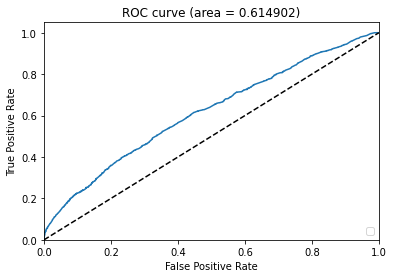

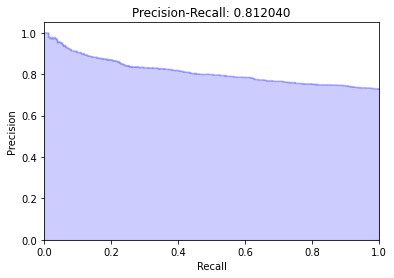

plotting variables of importance
meow

               precision    recall  f1-score   support

           0       1.00      0.01      0.02      2008
           1       0.73      1.00      0.84      5325

    accuracy                           0.73      7333
   macro avg       0.86      0.50      0.43      7333
weighted avg       0.80      0.73      0.62      7333



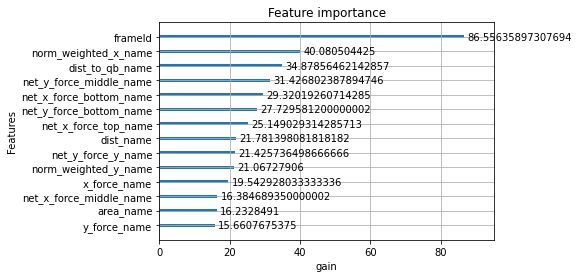

In [30]:
#ROC curves are appropriate when the observations are balanced between each class, 
#whereas precision-recall curves are appropriate for imbalanced datasets.
Y_test, y_scores = run_xgboost_and_calculate_auc(new_df1,target='bad_thing',plot_all=True,ensembler=True)


From confusion matrix above, we always guess 0 and 1 correctly. However, 
precision= true positive/(true positive+false positive). Out of all positives guessed, we have a few false positives

recall=true positive/(true positive+false negative). We have many false negative(0). 

In [ ]:
#check before feature engineering 

new_df2=copy.deepcopy(new_df1)
new_df2['net_xy_force_middle_ratio']=new_df2['net_x_force_middle_name']/new_df2['net_y_force_middle_name']
new_df2['net_xy_force_top_ratio']=new_df2['net_x_force_top_name']/new_df2['net_y_force_y_name']
new_df2['dist_to_qb_ratio_area']=new_df2['dist_to_qb_name']/new_df2['area_name']
new_df2.head(2)

In [ ]:

new_df2.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
new_df2.dropna(inplace=True)
print(new_df2.isnull().values.any())


In [ ]:
x_df1=new_df2[new_df2.columns[~new_df2.columns.isin(['bad_thing'])]]
y_df1=new_df2[new_df2.columns[new_df2.columns.isin(['bad_thing'])]]

In [ ]:
count = np.isinf(new_df2).values.sum()
print("Infinity values... ",count)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_df1, y_df1, test_size=0.33, random_state=42)

In [ ]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

# print(X_train.isnull().values.any())
# print(X_test.isnull().values.any())
# print(y_train.isnull().values.any())
# print(y_test.isnull().values.any())

In [ ]:
clf = xgb.XGBClassifier(max_depth=5, n_estimators=30,objective='binary:logistic')
# clf = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
#                         num_classes=2)

clf.fit(X_train, y_train)  
pred = clf.predict(X_test)

In [ ]:
print("Accuracy of Model::",accuracy_score(y_test,pred))

#didn't perform better

In [ ]:
#grid search
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score

parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [4,5,6],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [30,40,50] #number of trees, change it to 1000 for better results
            }

In [ ]:
skf = StratifiedKFold(n_splits=4, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb.XGBClassifier(), param_distributions=parameters, scoring='roc_auc', cv=skf.split(x_df1, y_df1), verbose=3, random_state=42 )

In [ ]:
random_search.fit(x_df1, y_df1)


In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)

In [ ]:
clf = xgb.XGBClassifier(max_depth=6,subsample=0.8, n_estimators=50,objective='binary:logistic',learning_rate=0.05,colsample_bytree=0.7)
# clf = xgb.XGBClassifier(max_depth=5, objective='multi:softprob', n_estimators=1000, 
#                         num_classes=2)

clf.fit(X_train, y_train)  
pred = clf.predict(X_test)
print("Accuracy of Model::",accuracy_score(y_test,pred))



In [ ]:
#do some random forest